In [103]:
import tensorflow as tf
import os
import cv2 
import imghdr
from matplotlib import pyplot as plt
import numpy as np

In [63]:
image_exts = ['jpeg', 'png', 'jpg']

In [204]:
data_dir = 'ML_Pneumonia/data/chest_xray/train'

In [71]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in list {}'.format(image_path))
        except Exception as e:
            print('issue with image {}'.format(image_path))

print('all good')

all good


In [300]:
data = tf.keras.utils.image_dataset_from_directory('ML_Pneumonia/data/chest_xray/train')

Found 5217 files belonging to 2 classes.


In [274]:
data_itr = data.as_numpy_iterator()

In [276]:
batch = data_itr.next()

In [278]:
batch[0].shape

(32, 256, 256, 3)

In [280]:
batch[1]

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

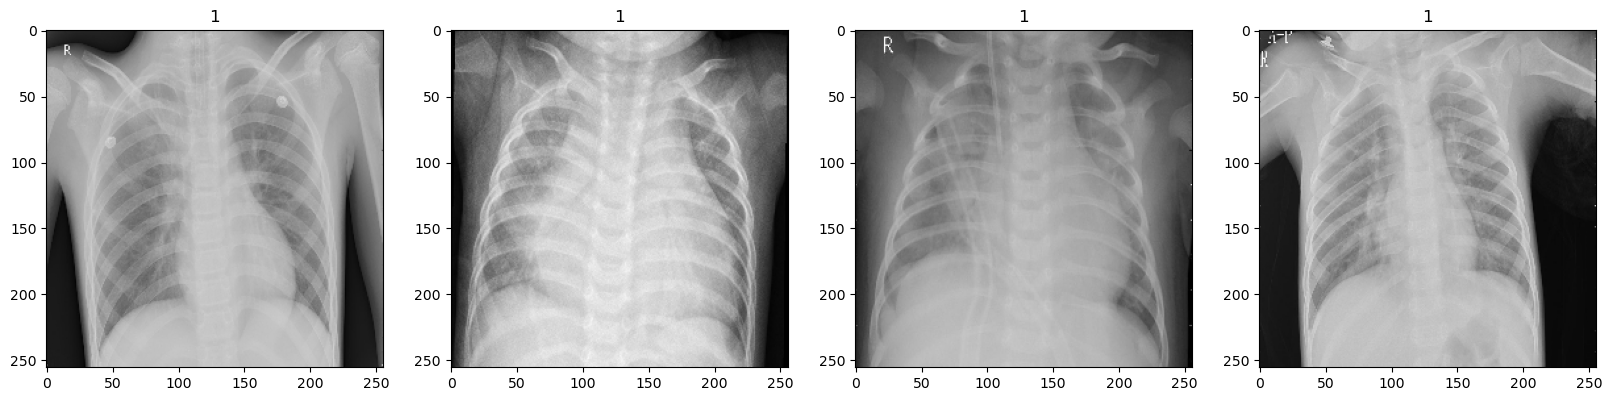

In [306]:
#0 - NORMAL, 1 - PNEUMONIA
fig, ax = plt.subplots(ncols = 4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [302]:
data = data.map(lambda x,y: (x/255, y))

In [304]:
batch = data.as_numpy_iterator().next()

In [254]:
test_data = tf.keras.utils.image_dataset_from_directory('ML_Pneumonia/data/chest_xray/test')

Found 626 files belonging to 2 classes.


In [256]:
test_data = test_data.map(lambda x,y: (x/255, y))

In [258]:
test_batch = test_data.as_numpy_iterator().next()

In [308]:
val_data = tf.keras.utils.image_dataset_from_directory('ML_Pneumonia/data/chest_xray/val')

Found 16 files belonging to 2 classes.


In [310]:
val_data = val_data.map(lambda x,y: (x/255, y))

In [312]:
val_batch = test_data.as_numpy_iterator().next()

In [314]:
train = data
test = test_data
val = val_data

In [414]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [448]:
model = Sequential()

In [450]:
model.add(Conv2D(32, (3,3), 1, activation='relu', padding='same', input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), 1, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

#model.add(Conv2D(128, (3,3), 1, activation='relu', padding='same'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(2,2))
#model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [452]:
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [454]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [456]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 262144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │    33,554,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,574,465 (128.08 MB)

 Trainable params: 33,574,273 (128.08 MB)

 Non-trainable params: 192 (768.00 B)

In [440]:
logdir = 'ML_Pneumonia/logs'

In [358]:
callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [458]:
history = model.fit(train, epochs=50, validation_data=val, callbacks=[early_stop])

Epoch 1/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 338s 2s/step - accuracy: 0.8620 - loss: 1.5323 - val_accuracy: 0.5625 - val_loss: 3.2346
Epoch 2/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 334s 2s/step - accuracy: 0.9567 - loss: 0.1139 - val_accuracy: 0.5625 - val_loss: 4.0444
Epoch 3/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 290s 2s/step - accuracy: 0.9660 - loss: 0.0928 - val_accuracy: 0.5625 - val_loss: 2.8365
Epoch 4/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 284s 2s/step - accuracy: 0.9666 - loss: 0.0925 - val_accuracy: 0.6250 - val_loss: 1.2022
Epoch 5/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 274s 2s/step - accuracy: 0.9751 - loss: 0.0849 - val_accuracy: 0.8125 - val_loss: 0.4802
Epoch 6/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 265s 2s/step - accuracy: 0.9730 - loss: 0.0721 - val_accuracy: 0.9375 - val_loss: 0.1431
Epoch 7/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 269s 2s/step - accuracy: 0.9798 - loss: 0.0591 - val_accuracy: 0.5625 - val_loss: 1.5139
Epoch 8/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 262s 2s/step - accuracy: 0.9646 - loss: 0.0980 - val_accu

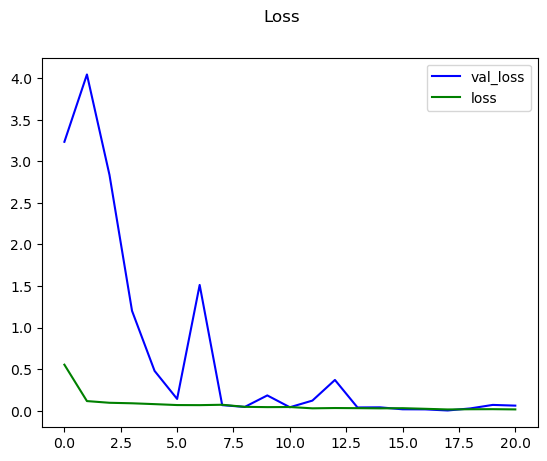

In [460]:
fig = plt.figure()
plt.plot(history.history['val_loss'], color='blue', label='val_loss')
plt.plot(history.history['loss'], color='green', label='loss')
fig.suptitle('Loss')
plt.legend(loc='upper right')
plt.show()

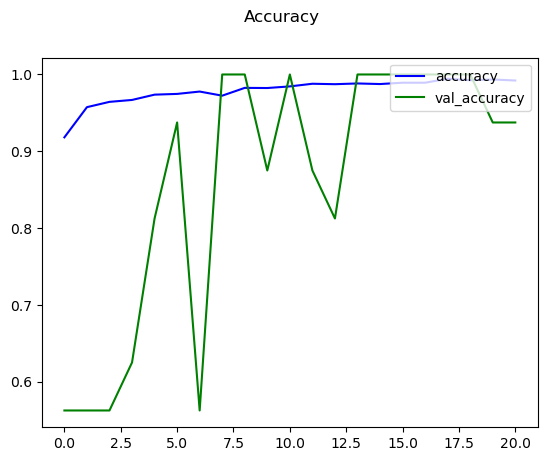

In [462]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='blue', label='accuracy')
plt.plot(history.history['val_accuracy'], color='green', label='val_accuracy')
fig.suptitle('Accuracy')
plt.legend(loc='upper right')
plt.show()

In [464]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [468]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [476]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


2025-07-27 18:13:03.661128: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [482]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 0.7320754528045654, Recall: 0.9948717951774597, Accuracy: 0.7699680328369141
